In [0]:
import numpy as np

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
!pip install quandl
import quandl
training_data=quandl.get("NSE/ICICISENSX", authtoken="ZCHrGRHYcySypC6nJjVt")

  Running setup.py bdist_wheel for inflection ... - done
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [7]:
training_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-04-10,355.61,355.61,354.22,354.22,354.22,160.0,0.57
2018-04-11,419.00,419.00,303.35,354.28,354.28,251.0,0.92
2018-04-12,355.43,356.25,355.43,355.83,355.83,128.0,0.46
2018-04-13,358.39,358.59,357.11,358.14,358.14,186.0,0.67
2018-04-16,375.00,375.00,357.21,357.40,357.40,535.0,1.92


In [0]:
training_data=training_data.iloc[:,1:2].values

In [9]:
training_data

array([[355.61],
       [419.  ],
       [356.25],
       [358.59],
       [375.  ],
       [359.93],
       [375.  ],
       [360.54],
       [359.84],
       [361.92],
       [361.92],
       [361.35],
       [363.42],
       [366.52],
       [367.45],
       [368.65],
       [367.72],
       [366.35],
       [367.92],
       [369.7 ],
       [369.24],
       [370.64],
       [371.99],
       [372.73],
       [375.72],
       [375.  ],
       [370.16],
       [366.16],
       [364.96],
       [363.51],
       [361.75],
       [360.24],
       [364.76],
       [369.08],
       [368.44],
       [365.27],
       [366.35],
       [371.64],
       [369.11],
       [366.71],
       [367.48],
       [371.8 ],
       [371.43],
       [373.84],
       [373.2 ],
       [374.96],
       [373.66],
       [374.21],
       [375.5 ],
       [380.  ],
       [396.  ],
       [373.51],
       [380.  ],
       [374.94],
       [373.82],
       [373.71],
       [387.  ],
       [370.69],
       [370.45

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc=MinMaxScaler()

In [0]:
training_data=sc.fit_transform(training_data)

In [13]:
type(training_data)

numpy.ndarray

In [14]:
training_data

array([[0.02552473],
       [0.69412509],
       [0.03227508],
       [0.05695602],
       [0.23003903],
       [0.07108955],
       [0.23003903],
       [0.07752347],
       [0.07014028],
       [0.09207889],
       [0.09207889],
       [0.08606687],
       [0.10790001],
       [0.14059698],
       [0.15040608],
       [0.16306297],
       [0.15325388],
       [0.13880392],
       [0.15536336],
       [0.17413775],
       [0.16928594],
       [0.18405232],
       [0.19829132],
       [0.2060964 ],
       [0.23763316],
       [0.23003903],
       [0.17898956],
       [0.13679992],
       [0.12414302],
       [0.10884928],
       [0.09028583],
       [0.07435924],
       [0.12203354],
       [0.16759835],
       [0.16084801],
       [0.12741272],
       [0.13880392],
       [0.19459973],
       [0.16791478],
       [0.14260099],
       [0.1507225 ],
       [0.19628731],
       [0.19238477],
       [0.21780403],
       [0.21105369],
       [0.22961713],
       [0.2159055 ],
       [0.221

In [0]:
X_train=training_data[0:2254]

In [0]:
y_train=training_data[0:2254]

In [63]:
y_train

array([[0.02552473],
       [0.69412509],
       [0.03227508],
       [0.05695602],
       [0.23003903],
       [0.07108955],
       [0.23003903],
       [0.07752347],
       [0.07014028],
       [0.09207889],
       [0.09207889],
       [0.08606687],
       [0.10790001],
       [0.14059698],
       [0.15040608],
       [0.16306297],
       [0.15325388],
       [0.13880392],
       [0.15536336],
       [0.17413775],
       [0.16928594],
       [0.18405232],
       [0.19829132],
       [0.2060964 ],
       [0.23763316],
       [0.23003903],
       [0.17898956],
       [0.13679992],
       [0.12414302],
       [0.10884928],
       [0.09028583],
       [0.07435924],
       [0.12203354],
       [0.16759835],
       [0.16084801],
       [0.12741272],
       [0.13880392],
       [0.19459973],
       [0.16791478],
       [0.14260099],
       [0.1507225 ],
       [0.19628731],
       [0.19238477],
       [0.21780403],
       [0.21105369],
       [0.22961713],
       [0.2159055 ],
       [0.221

In [0]:
#reshaping


In [0]:
X_train=np.reshape(X_train,(165,1,1))

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense

In [0]:
from keras.layers import LSTM 

In [0]:
regressor=Sequential()

In [0]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [0]:
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [72]:
regressor.fit(X_train,y_train,batch_size=32,epochs=300)

Epoch 1/300
165/165 [==============================] - 1s 8ms/step - loss: 0.0739
Epoch 2/300
165/165 [==============================] - 0s 132us/step - loss: 0.0683
Epoch 3/300
165/165 [==============================] - 0s 143us/step - loss: 0.0634
Epoch 4/300
165/165 [==============================] - 0s 140us/step - loss: 0.0585
Epoch 5/300
165/165 [==============================] - 0s 131us/step - loss: 0.0543
Epoch 6/300
165/165 [==============================] - 0s 133us/step - loss: 0.0509
Epoch 7/300
165/165 [==============================] - 0s 131us/step - loss: 0.0478
Epoch 8/300
165/165 [==============================] - 0s 145us/step - loss: 0.0453
Epoch 9/300
165/165 [==============================] - 0s 150us/step - loss: 0.0429
Epoch 10/300
165/165 [==============================] - 0s 172us/step - loss: 0.0412
Epoch 11/300
165/165 [==============================] - 0s 136us/step - loss: 0.0397
Epoch 12/300
165/165 [==============================] - 0s 142us/step - loss

In [0]:
test_data=quandl.get("NSE/ICICISENSX", authtoken="ZCHrGRHYcySypC6nJjVt")

In [0]:
real_price=test_data.iloc[:,1:2].values

In [0]:
my=np.array([[849]])

In [0]:
my=sc.transform(my)

In [0]:
my=np.reshape(my,(1,1,1))

In [0]:
pred=regressor.predict(my)

In [0]:
pred=sc.inverse_transform(pred)

In [81]:
pred

array([[479.66388]], dtype=float32)

In [82]:
real_price

array([[355.61],
       [419.  ],
       [356.25],
       [358.59],
       [375.  ],
       [359.93],
       [375.  ],
       [360.54],
       [359.84],
       [361.92],
       [361.92],
       [361.35],
       [363.42],
       [366.52],
       [367.45],
       [368.65],
       [367.72],
       [366.35],
       [367.92],
       [369.7 ],
       [369.24],
       [370.64],
       [371.99],
       [372.73],
       [375.72],
       [375.  ],
       [370.16],
       [366.16],
       [364.96],
       [363.51],
       [361.75],
       [360.24],
       [364.76],
       [369.08],
       [368.44],
       [365.27],
       [366.35],
       [371.64],
       [369.11],
       [366.71],
       [367.48],
       [371.8 ],
       [371.43],
       [373.84],
       [373.2 ],
       [374.96],
       [373.66],
       [374.21],
       [375.5 ],
       [380.  ],
       [396.  ],
       [373.51],
       [380.  ],
       [374.94],
       [373.82],
       [373.71],
       [387.  ],
       [370.69],
       [370.45

In [0]:
inputs=real_price

In [0]:
inputs=sc.transform(inputs)

In [0]:
inputs=np.reshape(inputs,(165,1,1))

In [0]:
predict_price=regressor.predict(inputs)

In [0]:
predict_price=sc.inverse_transform(predict_price)

In [89]:
predict_price

array([[370.01538],
       [397.94492],
       [370.2877 ],
       [371.2856 ],
       [378.37903],
       [371.85873],
       [378.37903],
       [372.12003],
       [371.82022],
       [372.71198],
       [372.71198],
       [372.46735],
       [373.35678],
       [374.69376],
       [375.09595],
       [375.61563],
       [375.2128 ],
       [374.62027],
       [375.2994 ],
       [376.07108],
       [375.8715 ],
       [376.4793 ],
       [377.06644],
       [377.3887 ],
       [378.6937 ],
       [378.37903],
       [376.27078],
       [374.53818],
       [374.02023],
       [373.39554],
       [372.639  ],
       [371.9915 ],
       [373.934  ],
       [375.8021 ],
       [375.52463],
       [374.15396],
       [374.62027],
       [376.91412],
       [375.8151 ],
       [374.77588],
       [375.10892],
       [376.98376],
       [376.82275],
       [377.87262],
       [377.59354],
       [378.36157],
       [377.7941 ],
       [378.0341 ],
       [378.59753],
       [380.56943],


Text(0,0.5,'Stock price')

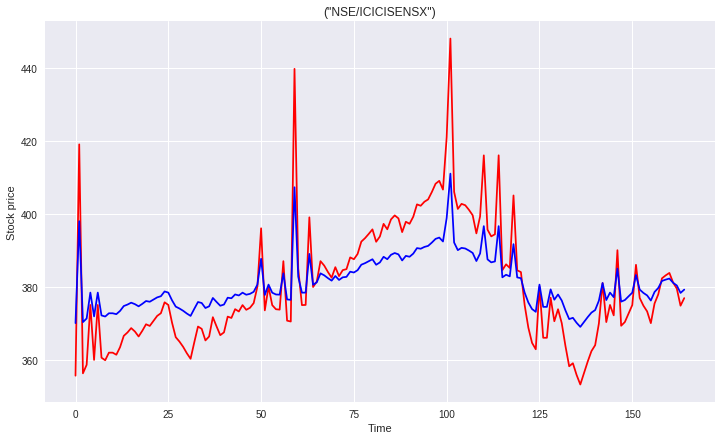

In [90]:
plt.figure(figsize=(12,7))
plt.plot(real_price,color='red',label='Real price')
plt.plot(predict_price,color='blue',label='Predict price')
plt.title('("NSE/ICICISENSX")')
plt.xlabel('Time')
plt.ylabel('Stock price')

In [0]:
from keras.models import load_model

In [0]:
regressor.save('newstock.h5')